# Book Recommend System

In [1]:
import os
import pickle

import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from sklearn import svm, tree, linear_model
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
tf.config.run_functions_eagerly(True)

In [2]:
data = pd.read_csv('Books.csv')

C:\Users\gosfl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
data1 = pd.read_csv('Ratings.csv')

In [5]:

data1 = pd.merge(left = data1 , right = data, how = "left", on = "ISBN")

In [6]:
data1['Book-Rating'].unique()
data1['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [7]:
data1['prefer'] = (data1['Book-Rating']>7).astype(int)

In [8]:
data1['prefer'].value_counts()

0    899893
1    249887
Name: prefer, dtype: int64

In [9]:
(
    data1
    .groupby('User-ID')
    .agg('count')
    .describe()
)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,prefer
count,105283.000000,105283.000000,105283.000000,105283.000000,105283.000000,105283.000000,105283.000000,105283.000000,105283.000000,105283.000000
mean,10.920851,10.920851,9.793946,9.793936,9.793946,9.793927,9.793946,9.793946,9.793908,10.920851
std,90.562825,90.562825,83.032990,83.032979,83.032990,83.031671,83.032990,83.032990,83.032884,90.562825
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
max,13602.000000,13602.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000,13602.000000


In [10]:
data_user = pd.read_csv('Users.csv')

In [11]:
data_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
#data_user = data_user.fillna(value=0)
data_user = data_user.dropna()
#data_user.loc[(data_user['Age'] ==0),'Age between'] = 0
data_user = data_user.dropna()
data_user.loc[(data_user['Age'] >0) & (data_user['Age'] <20),'Age between'] = 0
data_user.loc[(data_user['Age'] >=20) & (data_user['Age'] <40),'Age between'] = 1
data_user.loc[(data_user['Age'] >=40) & (data_user['Age'] <60),'Age between'] = 2
data_user.loc[(data_user['Age'] >=60),'Age between'] = 3

In [13]:
data1 = pd.merge(left = data1 , right = data_user, how = "left", on = "User-ID")

In [14]:

data_value = pd.DataFrame(data1['ISBN'].value_counts().head(10))
data_value.index

Index(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516',
       '044023722X', '0679781587', '0142001740', '067976402X', '0671027360'],
      dtype='object')

In [15]:
#data2 = data1[(data1['ISBN'].isin(data_value.index))]
#data2
#data2['Age between'].value_counts()
#data1['Age between'].value_counts()

In [16]:
#plt.scatter(data2['ISBN'],data2['Age'])
#plt.show()

In [17]:
num_of_user = len(data1['User-ID'].unique())
num_of_item = len(data1['ISBN'].unique())
num_of_author = len(data1['Book-Author'].unique())
num_of_publisher = len(data1['Publisher'].unique())
num_of_user, num_of_item, num_of_author, num_of_publisher

(105283, 340556, 101589, 16730)

In [18]:
def compile_model(num_of_user, num_of_item, learning_rate=0.001): 
    VECTOR_DIMENSION = 8
    
    user_input = keras.layers.Input((1,))
    user_embedding = keras.layers.Embedding(num_of_user, VECTOR_DIMENSION, input_length=1, name='user_embedding')
    user = user_embedding(user_input)
    user = keras.layers.Reshape((VECTOR_DIMENSION, 1))(user)
    
    item_input = keras.layers.Input((1,))
    item_embedding = keras.layers.Embedding(num_of_item, VECTOR_DIMENSION, input_length=1, name='item_embedding')
    item = item_embedding(item_input)
    item = keras.layers.Reshape((VECTOR_DIMENSION, 1))(item)
    
    dot_product = keras.layers.dot([user, item], axes=1) 
    output = keras.layers.Activation('sigmoid')(dot_product)
    
    model = keras.models.Model(inputs=[user_input, item_input], outputs=output) 
    model.compile(
        loss='binary_crossentropy', 
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
        metrics=['binary_accuracy'],
    )
    return model


model = compile_model(num_of_user, num_of_item)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 8)         842264      ['input_1[0][0]']                
                                                                                                  
 item_embedding (Embedding)     (None, 1, 8)         2724448     ['input_2[0][0]']                
                                                                                              

In [19]:
keras.utils.plot_model(
    model, to_file='movie.png', show_shapes=True, show_layer_activations=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [20]:
uid2idx = {v: k for k, v in dict(enumerate(data1['User-ID'].unique())).items()}
iid2idx = {v: k for k, v in dict(enumerate(data1['ISBN'].unique())).items()}
pub2idx = {v: k for k, v in dict(enumerate(data['Publisher'].unique())).items()}
aut2idx = {v: k for k, v in dict(enumerate(data['Book-Author'].unique())).items()}
name2idx = {v: k for k, v in dict(enumerate(data1['Book-Title'].unique())).items()}

data1 = data1.dropna()
print(data1)
dataset = pd.DataFrame()
dataset['uidx'] = data1['User-ID'].map(uid2idx.get)
#dataset['iidx'] = data1['ISBN'].map(iid2idx.get)
dataset['iidx'] = data1['Book-Title'].map(name2idx.get)
dataset['age'] = data1['Age between']
dataset['Publisher'] = data1['Publisher'].map(pub2idx.get)
dataset['author'] = data1['Book-Author'].map(aut2idx.get)
dataset['y'] = data1['prefer']
dataset
#dataset['iidx'] = dataset['iidx'] * 0.1

         User-ID        ISBN  Book-Rating  \
2         276727  0446520802            0   
3         276729  052165615X            3   
4         276729  0521795028            6   
5         276733  2080674722            0   
16        276747  0060517794            9   
...          ...         ...          ...   
1149756   276690  0590581066            0   
1149757   276690  0590907301            0   
1149776   276706  0679447156            0   
1149777   276709  0515107662           10   
1149778   276721  0590442449           10   

                                                Book-Title  \
2                                             The Notebook   
3                                           Help!: Level 1   
4        The Amsterdam Connection : Level 4 (Cambridge ...   
5                              Les Particules Elementaires   
16                                Little Altars Everywhere   
...                                                    ...   
1149756  Triplet Trouble 

,uidx,iidx,age,Publisher,author,y
2,2,2,0.0,73,192,0
3,3,3,0.0,372,91671,0
4,3,4,0.0,372,30646,0
5,4,5,1.0,369,3945,0
16,10,14,1.0,37,127,1
...,...,...,...,...,...,...
1149756,105276,184310,2.0,366,2720,0
1149757,105276,241069,2.0,735,2720,0
1149776,105279,6299,0.0,31,17796,0
1149777,105280,10044,1.0,133,453,1


In [21]:
data_x = np.array([
    dataset['uidx'].values, 
    dataset['iidx'].values, 
    dataset['age'].values,
    dataset['Publisher'].values,
    dataset['author'].values,
    dataset['y'].values, 
]).T
data_y = np.array([
    dataset['y'].values, 
    #dataset['author'].values,
    #dataset['age'].values,
]).T
print(data_x.shape, data_y.shape)
train_x, valid_x, train_y, valid_y = train_test_split(
    data_x, data_y, test_size=0.1,
)
valid_x, test_x, valid_y, test_y = train_test_split(
    valid_x, valid_y, test_size=0.5,
)
print(
    train_x.shape, train_y.shape, 
    valid_x.shape, valid_y.shape, 
    test_x.shape, test_y.shape,
)

(752735, 6) (752735, 1)
(677461, 6) (677461, 1) (37637, 6) (37637, 1) (37637, 6) (37637, 1)


In [22]:
#def evaluate(model, x, y):
#    pred = model.predict(x)
#    pred_ratio = pred.sum() / len(y)
#    y_ratio = y.sum() / len(y)
#    acc = (y == pred).sum() / len(y)
#    print(f'{pred_ratio=}, {y_ratio=}, {acc=}')

In [23]:
#%%time
#sample_size = 100000
#rbf_svc = svm.SVC()
#rbf_svc = rbf_svc.fit(train_x[:sample_size], train_y[:sample_size])

In [24]:
#evaluate(rbf_svc, valid_x, valid_y)

In [25]:
#evaluate(rbf_svc, test_x, test_y)

In [26]:
checkpoint_filepath = './model_{epoch:02d}_{val_loss:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
)

In [27]:
model = compile_model(num_of_user, num_of_item)
history = model.fit(
    x=(train_x[:,0,None], train_x[:,1,None]),
    y=train_y, 
    batch_size=1024,
    epochs=10, 
    verbose='auto',
    validation_data=((valid_x[:,0,None], valid_x[:,1,None]), valid_y), 
    shuffle=True,
    callbacks=[model_checkpoint_callback],
)

C:\Users\gosfl\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
662/662 [==============================] - 139s 210ms/step - loss: 0.6927 - binary_accuracy: 0.5316 - val_loss: 0.6903 - val_binary_accuracy: 0.6178
Epoch 2/10
662/662 [==============================] - 115s 174ms/step - loss: 0.6611 - binary_accuracy: 0.7999 - val_loss: 0.6327 - val_binary_accuracy: 0.6999
Epoch 3/10
662/662 [==============================] - 88s 132ms/step - loss: 0.5783 - binary_accuracy: 0.8716 - val_loss: 0.5824 - val_binary_accuracy: 0.7116
Epoch 4/10
662/662 [==============================] - 96s 146ms/step - loss: 0.5118 - binary_accuracy: 0.8803 - val_loss: 0.5572 - val_binary_accuracy: 0.7142
Epoch 5/10
662/662 [==============================] - 101s 152ms/step - loss: 0.4629 - binary_accuracy: 0.8832 - val_loss: 0.5446 - val_binary_accuracy: 0.7149
Epoch 6/10
662/662 [==============================] - 116s 175ms/step - loss: 0.4246 - binary_accuracy: 0.8859 - val_loss: 0.5389 - val_binary_accuracy: 0.7152
Epoch 7/10
662/662 [======================

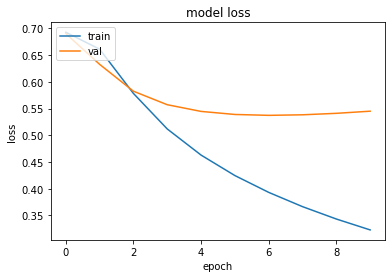

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
best_model = keras.models.load_model('./model_04_0.56.hdf5')

In [30]:
best_model.evaluate(
    x=(test_x[:,0,None], test_x[:,1,None]),
    y=test_y
)

1177/1177 [==============================] - 27s 23ms/step - loss: 0.5555 - binary_accuracy: 0.7150


[0.5555092096328735, 0.7149613499641418]

user_layer = best_model.layers[2]
item_layer = best_model.layers[3]
user_vectors = user_layer.get_weights()[0]
item_vectors = item_layer.get_weights()[0]
user_vectors.shape, item_vectors.shape

In [31]:
source_df = (
    data1
    .assign(
        bookIdx=lambda df: df['ISBN'].map(iid2idx.get),
    )
    .join(
        data1
        .groupby('ISBN')
        .agg(count=('prefer', 'count')) 
        .sort_values('count', ascending=False),
        on='ISBN',
        how='inner',
    )
)
print(len(source_df))
source_df.sort_values('count', ascending=False).head(17)

752735


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,prefer,Location,Age,Age between,bookIdx,count
1136297,273224,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"roseville, california, usa",13.0,0.0,452,2137
369252,88693,0971880107,4,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"shanghai, shanghai, china",30.0,1.0,452,2137
364381,87555,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"lexington, kentucky, usa",31.0,1.0,452,2137
364509,87595,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"barcelona, catalunya, spain",42.0,2.0,452,2137
364673,87649,0971880107,2,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"lakes entrance, victoria, australia",57.0,2.0,452,2137
364817,87707,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"paris, ile de france, france",23.0,1.0,452,2137
365015,87712,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"yarmouth, nova scotia, canada",19.0,0.0,452,2137
365062,87729,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"figueira da foz, coimbra, portugal",24.0,1.0,452,2137
365859,87746,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"wallingford, connecticut, usa",52.0,2.0,452,2137
365993,87794,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,0,"loudon, new hampshire, usa",33.0,1.0,452,2137


In [32]:
data = data.rename(columns={'Book-Title':'bookname'})

In [33]:
def consine_similarity(v, mat, topn=10):
    sim = np.dot(v, mat.T) / (np.linalg.norm(v) * np.linalg.norm(mat, axis=1))
    ind = np.argpartition(sim, -(topn + 1))[-(topn + 1):]
    ind = ind[np.argsort(sim[ind])][topn - 1::-1]
    return sim[ind], ind

In [34]:
sim, ind = consine_similarity(item_vectors[113], item_vectors)
print(sim)
print(ind)
source_df[source_df['bookIdx'].isin(ind)]

NameError: name 'item_vectors' is not defined

In [ ]:
def recommend(bookname):
    book_list_name = []
    li = data[data['bookname'] == bookname]
    book_id  = data[data['bookname'] == bookname].index
    book_id = book_id[0]
    
    for newid in islist[book_id]:
        book_list_name.append(data.loc[newid].bookname)
        
        
    return book_list_name   

In [ ]:
recommend('Clara Callan')